# The Central Limit Theorem in Action

This notebook will contain some examples for the Central Limit Theorem

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# seed for reproducibility
np.random.seed(seed=19823748)

In [3]:
population1 = np.random.binomial(n=10, p=0.2, size=10000)
population2 = np.random.binomial(n=10, p=0.5, size=10000)

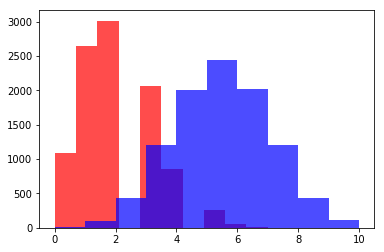

In [4]:
# plot the populations for visual reference later on
_ = plt.hist(population1, color='red', alpha=0.7)
_ = plt.hist(population2, color='blue', alpha=0.7)

### Sampling Hypothesis

I expect that after I create the population, and sample from it, that the values from the sample will roughly resemble their population's shape. I suspect that as I increase the sample size, the more the sample distribution will look like the population distribution. I also expect the `standard deviation` and `mean` of the samples to approach their respective `population` values as the `sample size` increases. As the sample size decreases, I expect the shape to become more random, and the `mean` and `standard deviation` to become less and less like their `population` values.

Sample 1 Mean: 2.1
Sample 1 Standard Deviation: 1.118033988749895
Sample 2 Mean: 4.72
Sample 2 Standard Deviation: 1.6314410807626487


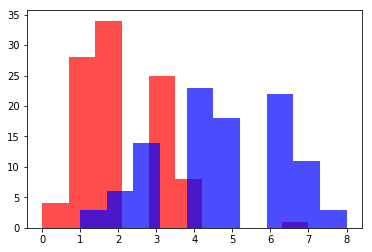

In [5]:
sample1 = np.random.choice(population1, 100, replace=True)
sample2 = np.random.choice(population2, 100, replace=True)

_ = plt.hist(sample1, color='red', alpha=0.7)
_ = plt.hist(sample2, color='blue', alpha=0.7)

samp1_mean = sample1.mean()
samp1_std = sample1.std()
samp2_mean = sample2.mean()
samp2_std = sample2.std()

print("Sample 1 Mean: {}".format(samp1_mean))
print("Sample 1 Standard Deviation: {}".format(samp1_std))
print("Sample 2 Mean: {}".format(samp2_mean))
print("Sample 2 Standard Deviation: {}".format(samp2_std))


Sample 1 Mean: 2.037
Sample 1 Standard Deviation: 1.231921669587803
Sample 2 Mean: 4.974
Sample 2 Standard Deviation: 1.613481949077832


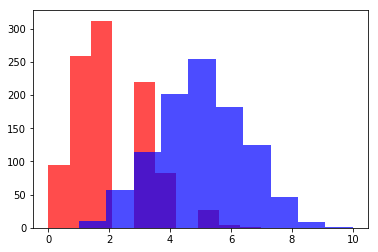

In [6]:
# increase the sample size to 1000, up from 100, re-calculate
# the median and mean

sample1 = np.random.choice(population1, 1000, replace=True)
sample2 = np.random.choice(population2, 1000, replace=True)

# plot the values on a histogram
_ = plt.hist(sample1, color='red', alpha=0.7)
_ = plt.hist(sample2, color='blue', alpha=0.7)


# compute the mean, and std
samp1_mean = sample1.mean()
samp1_std = sample1.std()

samp2_mean = sample2.mean()
samp2_std = sample2.std()


print("Sample 1 Mean: {}".format(samp1_mean))
print("Sample 1 Standard Deviation: {}".format(samp1_std))
print("Sample 2 Mean: {}".format(samp2_mean))
print("Sample 2 Standard Deviation: {}".format(samp2_std))



### Redefining Population Values

Redefine the population to compare. We'll compute the `t-statistic` and the associated `p-value`.

In [7]:
def increment_population_samples(pop1, pop2):
    p_values = []
    t_statistics = []
    sample_sizes = []
    
    for sample_size in range(10, 1000, 100):
        sample_sizes.append(sample_size)
        # calculate the sample sizes
        sample1 = np.random.choice(pop1, size=sample_size)
        sample2 = np.random.choice(pop2, size=sample_size)

        # compute the t-statistic and associated p-value
        t_statistic, p_value = scipy.stats.ttest_ind(sample1, sample2, equal_var=True)

        t_statistics.append(t_statistic)
        p_values.append(p_value)
    
    
        # now show the actual histograms to visualize the change
        plt.hist(sample1, color='red', alpha=0.7)
        plt.hist(sample2, color='blue', alpha=0.7)
        plt.show()
    
    return (p_values, t_statistics, sample_sizes)


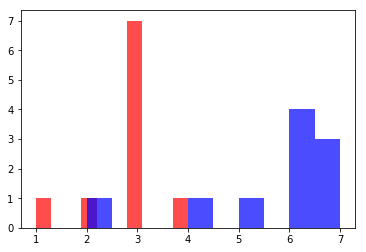

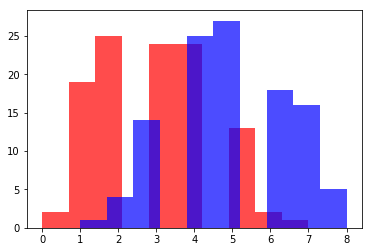

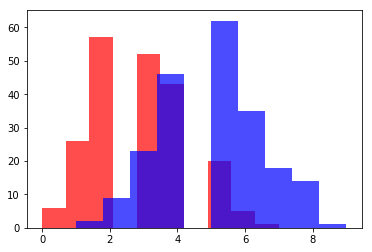

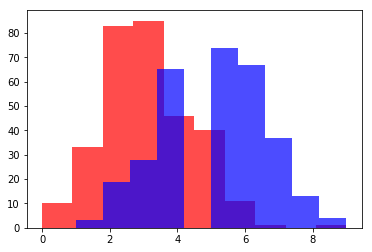

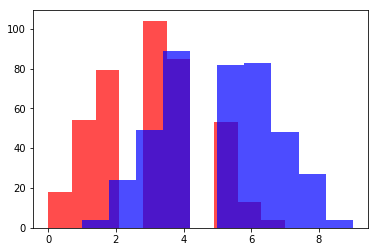

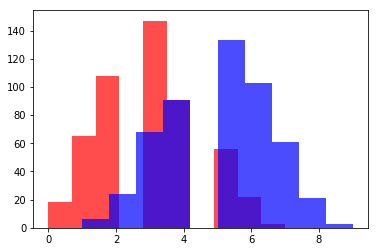

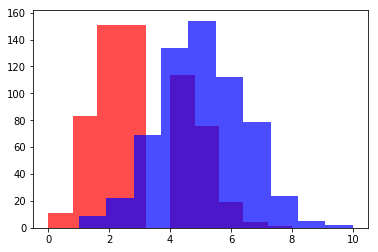

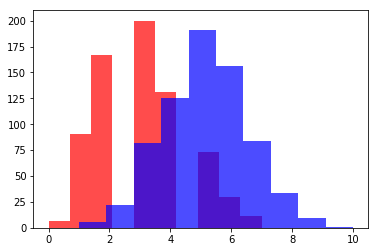

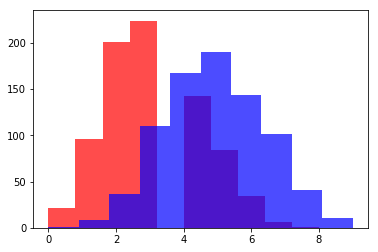

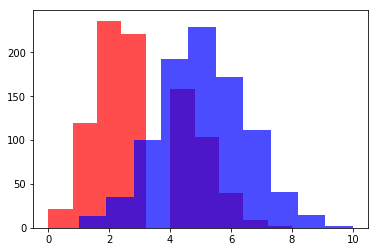

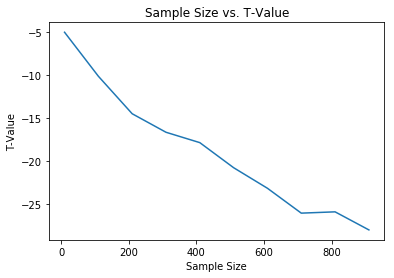

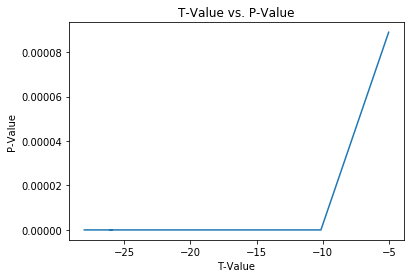

In [8]:
population1 = np.random.binomial(n=10, p=0.3, size=10000)

p_values, t_statistics, sample_sizes = increment_population_samples(population1, population2)




# plot the t_statistics against the sample sizes

plt.plot(sample_sizes, t_statistics)
plt.title("Sample Size vs. T-Value")
plt.xlabel("Sample Size")
plt.ylabel("T-Value")
plt.show()

# plot the t_statistics against the p-values

plt.plot(t_statistics, p_values)
plt.title("T-Value vs. P-Value")
plt.xlabel("T-Value")
plt.ylabel("P-Value")
plt.show()


### Changing up Distributions

Now, I am going to change the distribution type to see if things work similarly to a bi-nomial distribution


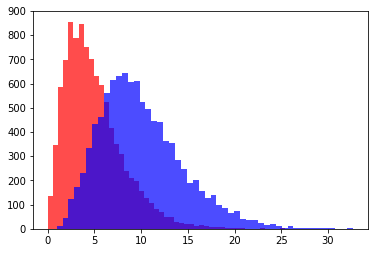

In [9]:
population1 = np.random.chisquare(5, size=10000)
population2 = np.random.chisquare(10, size=10000)

_ = plt.hist(population1, color='red', alpha=0.7, bins=50)
_ = plt.hist(population2, color='blue', alpha=0.7, bins=50)


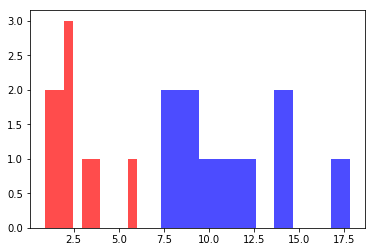

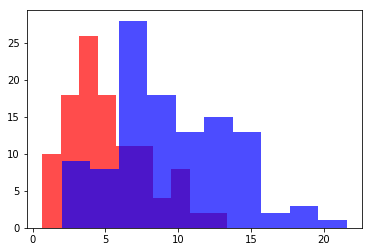

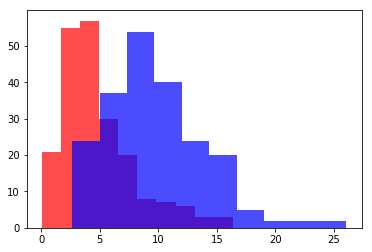

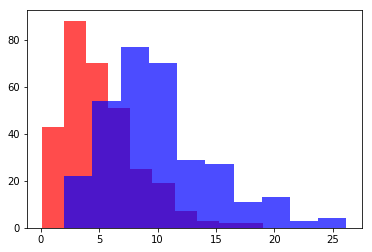

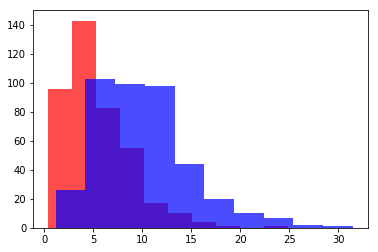

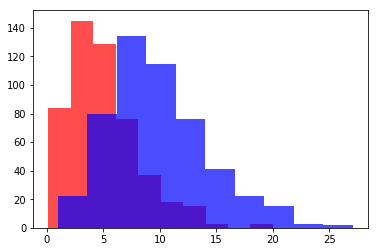

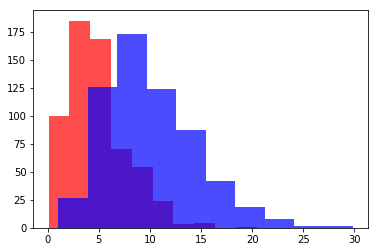

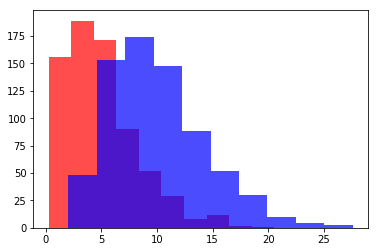

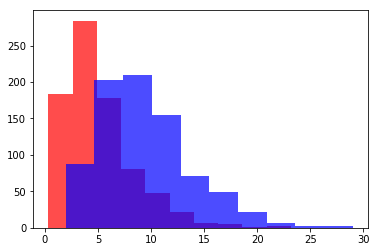

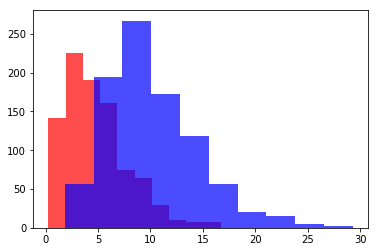

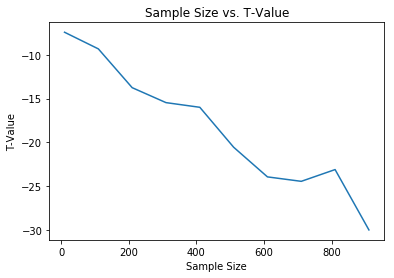

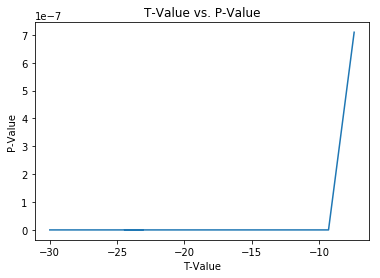

In [10]:
# re-do the sampling, this time with the new chisquare distribution

p_values, t_statistics, sample_sizes = increment_population_samples(population1, population2)


plt.plot(sample_sizes, t_statistics)
plt.title("Sample Size vs. T-Value")
plt.xlabel("Sample Size")
plt.ylabel("T-Value")
plt.show()

# plot the t_statistics against the p-values

plt.plot(t_statistics, p_values)
plt.title("T-Value vs. P-Value")
plt.xlabel("T-Value")
plt.ylabel("P-Value")
plt.show()
